In [1]:
from satellite_sim import Satellite_avoid_basis_function
from model_observatory import Model_observatory
import sat_utils


import healpy as hp
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

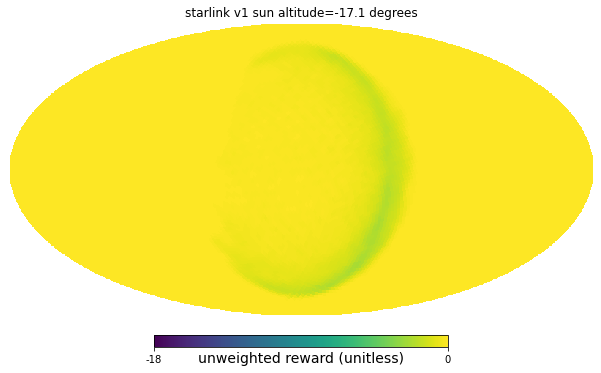

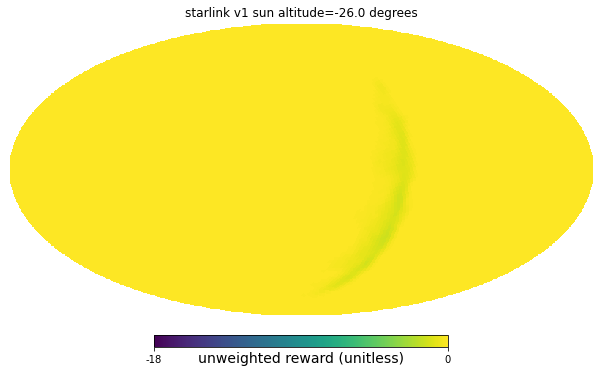

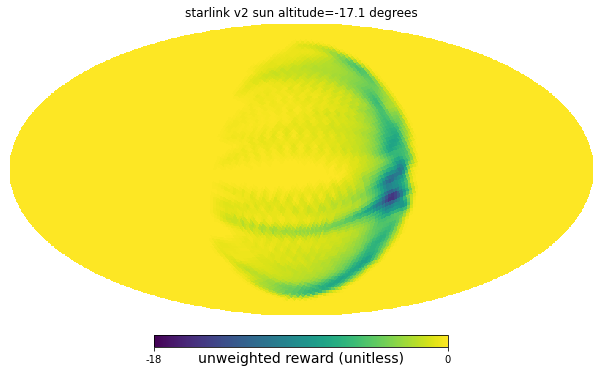

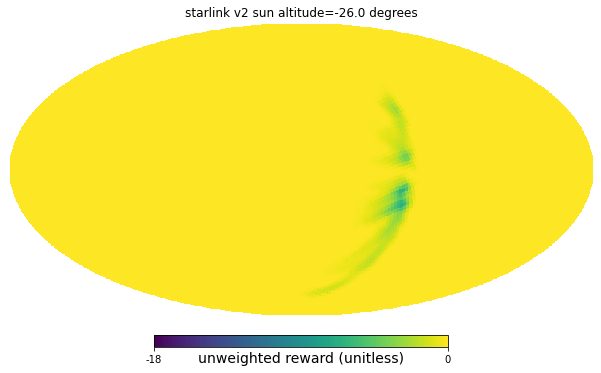

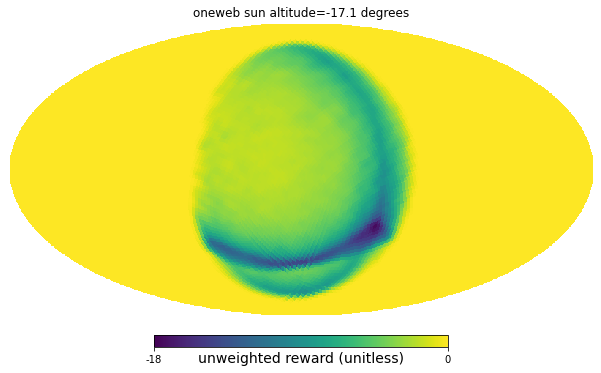

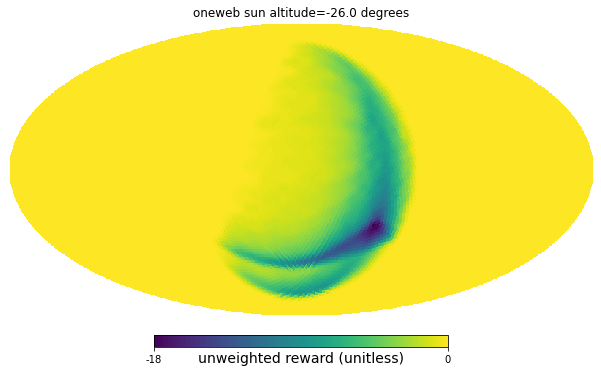

In [2]:
# build a satellite constellation, hand it to the observatory
# This takes a while since the observatory then makes predicitons for the whole night

# observatory is building satellite maps based on snapshots of the sky every 10s
# basis function sums over the next observing block (here 90min), and smooths by
# the telescope field of view
constellation_name = 'starlink_constellation_v1'

for constellation_name in ['starlink_constellation_v1', 'starlink_constellation_v2', 'oneweb_constellation']:

    func = getattr(sat_utils, constellation_name)
    tles = func()
    constellation = sat_utils.Constellation(tles)
    
    mo = Model_observatory(constellation=constellation)
    for tstep in [0, .03]:
        mo.mjd += tstep
        conditions = mo.return_conditions()
        bf = Satellite_avoid_basis_function()
        sat_map = bf(conditions)

        title = constellation_name.replace('_constellation', '').replace('_', ' ')
        title += ' sun altitude=%.1f degrees' % np.degrees(conditions.sunAlt)
        hp.mollview(sat_map, rot=(conditions.lmst*180/12., conditions.site.latitude),
                    title=title, unit='unweighted reward (unitless)', min=-18, max=0)
        plt.savefig('plots/'+constellation_name+'_%.1f_basisfunc.pdf' % tstep)

In [3]:
np.degrees(conditions.sunAlt)

-25.98487659098268